In [126]:
import numpy as np

# Numpy

Материалы:
* Макрушин С.В. "Лекция 1: Библиотека Numpy"
* https://numpy.org/doc/stable/user/index.html
* https://numpy.org/doc/stable/reference/index.html

## Задачи для совместного разбора

1. Сгенерировать двухмерный массив `arr` размерности (4, 7), состоящий из случайных действительных чисел, равномерно распределенных в диапазоне от 0 до 20. Нормализовать значения массива с помощью преобразования вида  $𝑎𝑥+𝑏$  так, что после нормализации максимальный элемент масcива будет равен 1.0, минимальный 0.0

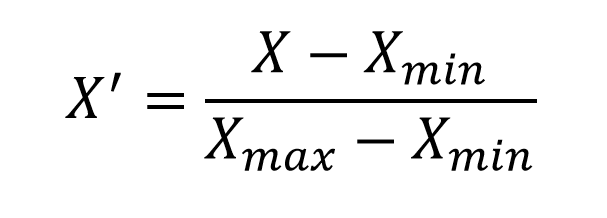

In [133]:
array = np.random.uniform(0, 20, (4,7))
X = (array - np.min(array)) / (np.max(array) - np.min(array))
array, X

(array([[ 0.6600961 ,  7.57350213,  2.15070299, 16.64000086, 18.81509014,
         16.84870488,  5.22818493],
        [10.87031074,  0.66172229, 18.11357758, 10.43111116,  3.22488078,
         11.74115122, 13.77350205],
        [12.95969425,  4.41576704, 15.17379068,  0.16894645,  4.42803402,
         16.61550286,  3.80721204],
        [ 1.30464962, 17.2831588 ,  8.6662108 , 19.65863115, 10.74780088,
          7.7934344 ,  7.88777819]]),
 array([[0.02520049, 0.37992178, 0.10168233, 0.84511652, 0.95671859,
         0.85582495, 0.25958545],
        [0.54907837, 0.02528393, 0.92072455, 0.52654339, 0.15679753,
         0.59376049, 0.69803877],
        [0.65628295, 0.21790094, 0.76988645, 0.        , 0.21853035,
         0.84385954, 0.18667647],
        [0.05827201, 0.87811643, 0.43598778, 1.        , 0.54279249,
         0.39120633, 0.39604703]]))

2. Создать матрицу 8 на 10 из случайных целых (используя модуль `numpy.random`) чисел из диапозона от 0 до 10 и найти в ней строку (ее индекс и вывести саму строку), в которой сумма значений минимальна.

In [136]:
matrix = np.random.uniform(0, 10, size=(8,10))
min_id = np.argmin(matrix.sum(axis=1))
matrix[min_id]

array([0.92323728, 2.68578777, 4.97184251, 1.55973304, 3.04476391,
       2.84301019, 3.84900333, 2.41575667, 0.64275483, 8.34140637])

3. Найти евклидово расстояние между двумя одномерными векторами одинаковой размерности.

In [139]:
a = np.random.randint(0, 10, size=(1,7))
b = np.random.randint(0, 10, size=(1,7))

evkl = np.sqrt(np.sum(np.square(a-b)))
evkl

9.0

4. Решить матричное уравнение `A*X*B=-C` - найти матрицу `X`. Где `A = [[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]`, `B=[[3, -1], [2, 1]]`, `C=[[7, 21], [11, 8], [8, 4]]`.

In [142]:
A = np.array([
    [-1, 2, 4], 
    [-3, 1, 2], 
    [-3, 0, 1]
])

B = np.array([
    [3, -1], 
    [2, 1]
])

C = np.array([
    [7, 21], 
    [11, 8], 
    [8, 4]
])


X = np.dot(np.dot(np.linalg.inv(A),-C), np.linalg.inv(B))
X

array([[ 1.00000000e+00,  5.32907052e-16],
       [-2.00000000e+00,  1.00000000e+00],
       [ 3.00000000e+00, -4.00000000e+00]])

## Лабораторная работа №1

Замечание: при решении данных задач не подразумевается использования циклов или генераторов Python, если в задании не сказано обратного. Решение должно опираться на использования функционала библиотеки `numpy`.

1. Файл `minutes_n_ingredients.csv` содержит информацию об идентификаторе рецепта, времени его выполнения в минутах и количестве необходимых ингредиентов. Считайте данные из этого файла в виде массива `numpy` типа `int32`, используя `np.loadtxt`. Выведите на экран первые 5 строк массива.

In [145]:
with open("minutes_n_ingredients.csv") as f:
    headers = f.readline().replace("\n", "").split(",")
headers

['id', 'minutes', 'n_ingredients']

In [147]:
arr = np.loadtxt("minutes_n_ingredients.csv", delimiter=",", skiprows=1, dtype=np.int32)
arr[:5, :]

array([[127244,     60,     16],
       [ 23891,     25,      7],
       [ 94746,     10,      6],
       [ 67660,      5,      6],
       [162911,     60,     14]], dtype=int32)

2. Вычислите среднее значение, минимум, максимум и медиану по каждому из столбцов, кроме первого.

In [150]:
avg_col2 = np.mean(arr[:, 1], axis=0)
minimum_col2 = np.min(arr[:, 1], axis=0)
maximum_col2 = np.max(arr[:, 1], axis=0)
median_col2 = np.median(arr[:, 1], axis=0)

avg_col2, minimum_col2, maximum_col2, median_col2

(21601.39799, 0, 2147483647, 40.0)

In [152]:
avg_col3 = np.mean(arr[:, 2], axis=0)
minimum_col3 = np.min(arr[:, 2], axis=0)
maximum_col3 = np.max(arr[:, 2], axis=0)
median_col3 = np.median(arr[:, 2], axis=0)

avg_col3, minimum_col3, maximum_col3, median_col3

(9.05528, 1, 39, 9.0)

3. Ограничьте сверху значения продолжительности выполнения рецепта значением квантиля $q_{0.75}$. 

In [120]:
quantile = np.quantile(arr[:, 1], 0.75)
arr[:, 1] = np.where(arr[:, 1] > quantile, quantile, arr[:, 1])
quantile, arr[:, 1]

(65.0, array([60, 25, 10, ..., 65,  5, 65], dtype=int32))

4. Посчитайте, для скольких рецептов указана продолжительность, равная нулю. Замените для таких строк значение в данном столбце на 1.

In [118]:
cnt = np.sum(np.where(arr[:, 1] == 0, 1, 0))
arr[:, 1] = np.where(arr[:, 1] == 0, 1, arr[:, 1])

cnt

479

5. Посчитайте, сколько уникальных рецептов находится в датасете.

In [80]:
cnt_unique = len(np.unique(arr[:, 0]))
cnt_unique

98252

6. Сколько и каких различных значений кол-ва ингредиентов присутвует в рецептах из датасета?

In [29]:
unique_ingr_count = list(np.unique(arr[:, 2]))
unique_ingr_count, len(unique_ingr_count)

([1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  37,
  39],
 37)

7. Создайте версию массива, содержащую информацию только о рецептах, состоящих не более чем из 5 ингредиентов.

In [78]:
new_arr = np.copy(arr)[arr[:, 2] <= 5]
new_arr

array([[446597,     15,      5],
       [204134,      5,      3],
       [ 25623,      6,      4],
       ...,
       [ 52088,     60,      5],
       [128811,     15,      4],
       [380915,      5,      4]], dtype=int32)

8. Для каждого рецепта посчитайте, сколько в среднем ингредиентов приходится на одну минуту рецепта. Найдите максимальное значение этой величины для всего датасета

In [76]:
ingr_per_min = arr[:,2] / arr[:,1]
ingr_per_min, np.max(ingr_per_min)

(array([0.26666667, 0.28      , 0.6       , ..., 0.23076923, 0.8       ,
        0.21538462]),
 24.0)

9. Вычислите среднее количество ингредиентов для топ-100 рецептов с наибольшей продолжительностью

In [74]:
sorted_idx = np.argsort(arr[:, 1])[::-1]
np.mean(arr[sorted_idx][:100][:, 2])

9.75

10. Выберите случайным образом и выведите информацию о 10 различных рецептах

In [37]:
idx = np.random.choice(arr.shape[0], size=10)
arr[idx]

array([[ 41677,     65,      9],
       [330848,     11,      5],
       [530160,     23,      3],
       [378236,      5,      5],
       [158399,     15,      4],
       [280534,     65,      5],
       [494910,     10,      7],
       [254918,     30,      8],
       [464766,     50,     12],
       [ 15053,     60,      4]], dtype=int32)

11. Выведите процент рецептов, кол-во ингредиентов в которых меньше среднего.

In [39]:
avg_count_ing = np.mean(arr[:, 2])
cnt = np.sum(np.where(arr[:, 2] < avg_count_ing, 1, 0))
percentage = (cnt * 100) / len(arr[:, 0])
print(f"{percentage}%")

58.802%


12. Назовем "простым" такой рецепт, длительность выполнения которого не больше 20 минут и кол-во ингредиентов в котором не больше 5. Создайте версию датасета с дополнительным столбцом, значениями которого являются 1, если рецепт простой, и 0 в противном случае.

In [41]:
arr_with_headers = np.vstack([headers, arr]).astype('<U11')
arr_with_headers

array([['id', 'minutes', 'n_ingredien'],
       ['127244', '60', '16'],
       ['23891', '25', '7'],
       ...,
       ['498432', '65', '15'],
       ['380915', '5', '4'],
       ['81993', '65', '14']], dtype='<U11')

In [42]:
simple_arr = np.where((arr[:, 1] <= 20) & (arr[:, 2] <= 5), 1, 0)
dop = np.insert(simple_arr.astype('<U11'), 0, "Тип рецепта:").reshape(100001, 1)
new_arr = np.hstack([arr_with_headers, dop])
new_arr

array([['id', 'minutes', 'n_ingredien', 'Тип рецепта'],
       ['127244', '60', '16', '0'],
       ['23891', '25', '7', '0'],
       ...,
       ['498432', '65', '15', '0'],
       ['380915', '5', '4', '1'],
       ['81993', '65', '14', '0']], dtype='<U11')

In [43]:
np.savetxt("new_arr.csv", new_arr, delimiter = ",", fmt='%s')

13. Выведите процент "простых" рецептов в датасете

In [45]:
with open("new_arr.csv") as file:
    headers = file.readline().replace("\n", "").split(",")
headers

['id', 'minutes', 'n_ingredien', 'Тип рецепта']

In [46]:
data = np.loadtxt("new_arr.csv", delimiter=",", skiprows=1, dtype=np.int32)
cnt_simp = np.sum(data[:, 3])
percentage_simp = (cnt_simp * 100) / len(data)
print(f"{percentage_simp}%")

9.552%


14. Разделим рецепты на группы по следующему правилу. Назовем рецепты короткими, если их продолжительность составляет менее 10 минут; стандартными, если их продолжительность составляет более 10, но менее 20 минут; и длинными, если их продолжительность составляет не менее 20 минут. Создайте трехмерный массив, где нулевая ось отвечает за номер группы (короткий, стандартный или длинный рецепт), первая ось - за сам рецепт и вторая ось - за характеристики рецепта. Выберите максимальное количество рецептов из каждой группы таким образом, чтобы было возможно сформировать трехмерный массив. Выведите форму полученного массива.

In [48]:
short = arr[arr[:, 1] < 10]                
standard = arr[(arr[:, 1] >= 10) & (data[:, 1] < 20)]  
long = arr[arr[:, 1] >= 20]            

min_size = min(len(short), len(standard), len(long))


short = short[:min_size]
standard = standard[:min_size]
long = long[:min_size]


recipes_3d = np.array([short, standard, long])



recipes_3d

array([[[ 67660,      5,      6],
        [366174,      7,      9],
        [204134,      5,      3],
        ...,
        [420725,      5,      3],
        [  4747,      1,      9],
        [380915,      5,      4]],

       [[ 94746,     10,      6],
        [ 33941,     18,      9],
        [446597,     15,      5],
        ...,
        [  9831,     15,      7],
        [335859,     12,     14],
        [256812,     10,      3]],

       [[127244,     60,     16],
        [ 23891,     25,      7],
        [162911,     60,     14],
        ...,
        [168901,     25,      7],
        [392339,     35,     13],
        [206732,     45,     10]]], dtype=int32)